In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import corner
from scipy import stats

In [4]:
#param_names = ['kappa','mu','attenu','kappa0','lambd']
param_names = ['kappa','mu','attenu']

#name1 = '../output/210726-133639_M-I5-D2'
#name1 = '../output/210727-141024_M-I5-E1'
#name1 = '../output/210805-031128_M-I5-F1'
#name1 = '../output/210805-161158_M-I5-G1-test'
#name1 = '../output/210805-164515_M-I5-G1-test'
#name1 = '../output/210806-033752_M-I6-A1-final'

#name1 = '../output/210807-200011_3p-both-A1'
#name1 = '../output/210807-212633_3p-both-A2'
name1 = '../output/210807-212633_3p-both-A2'
#name1 = '../output/210807-212240_3p-pacific-A2'

#parameter that excludes 0 in range
param_nonzero = 2
finish = True

In [5]:
file1 = h5py.File(name1+'.h5', 'r')
#file2 = h5py.File(name2+'.h5', 'r')
#file3 = h5py.File(name3+'.h5', 'r')

chain1 = np.array(file1.get('mcmc').get('chain'))
#chain2 = np.array(file2.get('mcmc').get('chain'))
#chain3 = np.array(file2.get('mcmc').get('chain'))

if not finish:
    nsteps1 = np.where(chain1[:,0,param_nonzero]==0)[0][0]
    #nsteps2 = np.where(chain2[:,0,param_nonzero]==0)[0][0]
    #nsteps3 = np.where(chain3[:,0,param_nonzero]==0)[0][0]

    chain1 = np.array(file1.get('mcmc').get('chain'))[:nsteps1]
    #chain2 = np.array(file2.get('mcmc').get('chain'))[:nsteps2]
    #chain3 = np.array(file3.get('mcmc').get('chain'))[:nsteps3]
    
print('File 1 shape: ', chain1.shape)
#print('File 2 shape: ', chain2.shape)
#print('File 3 shape: ', chain3.shape)

prob1 = np.array(file1.get('mcmc').get('log_prob'))
#prob2 = np.array(file2.get('mcmc').get('log_prob'))
#prob3 = np.array(file3.get('mcmc').get('log_prob'))

accepted1 = np.array(file1.get('mcmc').get('accepted'))
#accepted2 = np.array(file2.get('mcmc').get('accepted'))
#accepted2 = np.array(file3.get('mcmc').get('accepted'))

File 1 shape:  (10000, 24, 3)


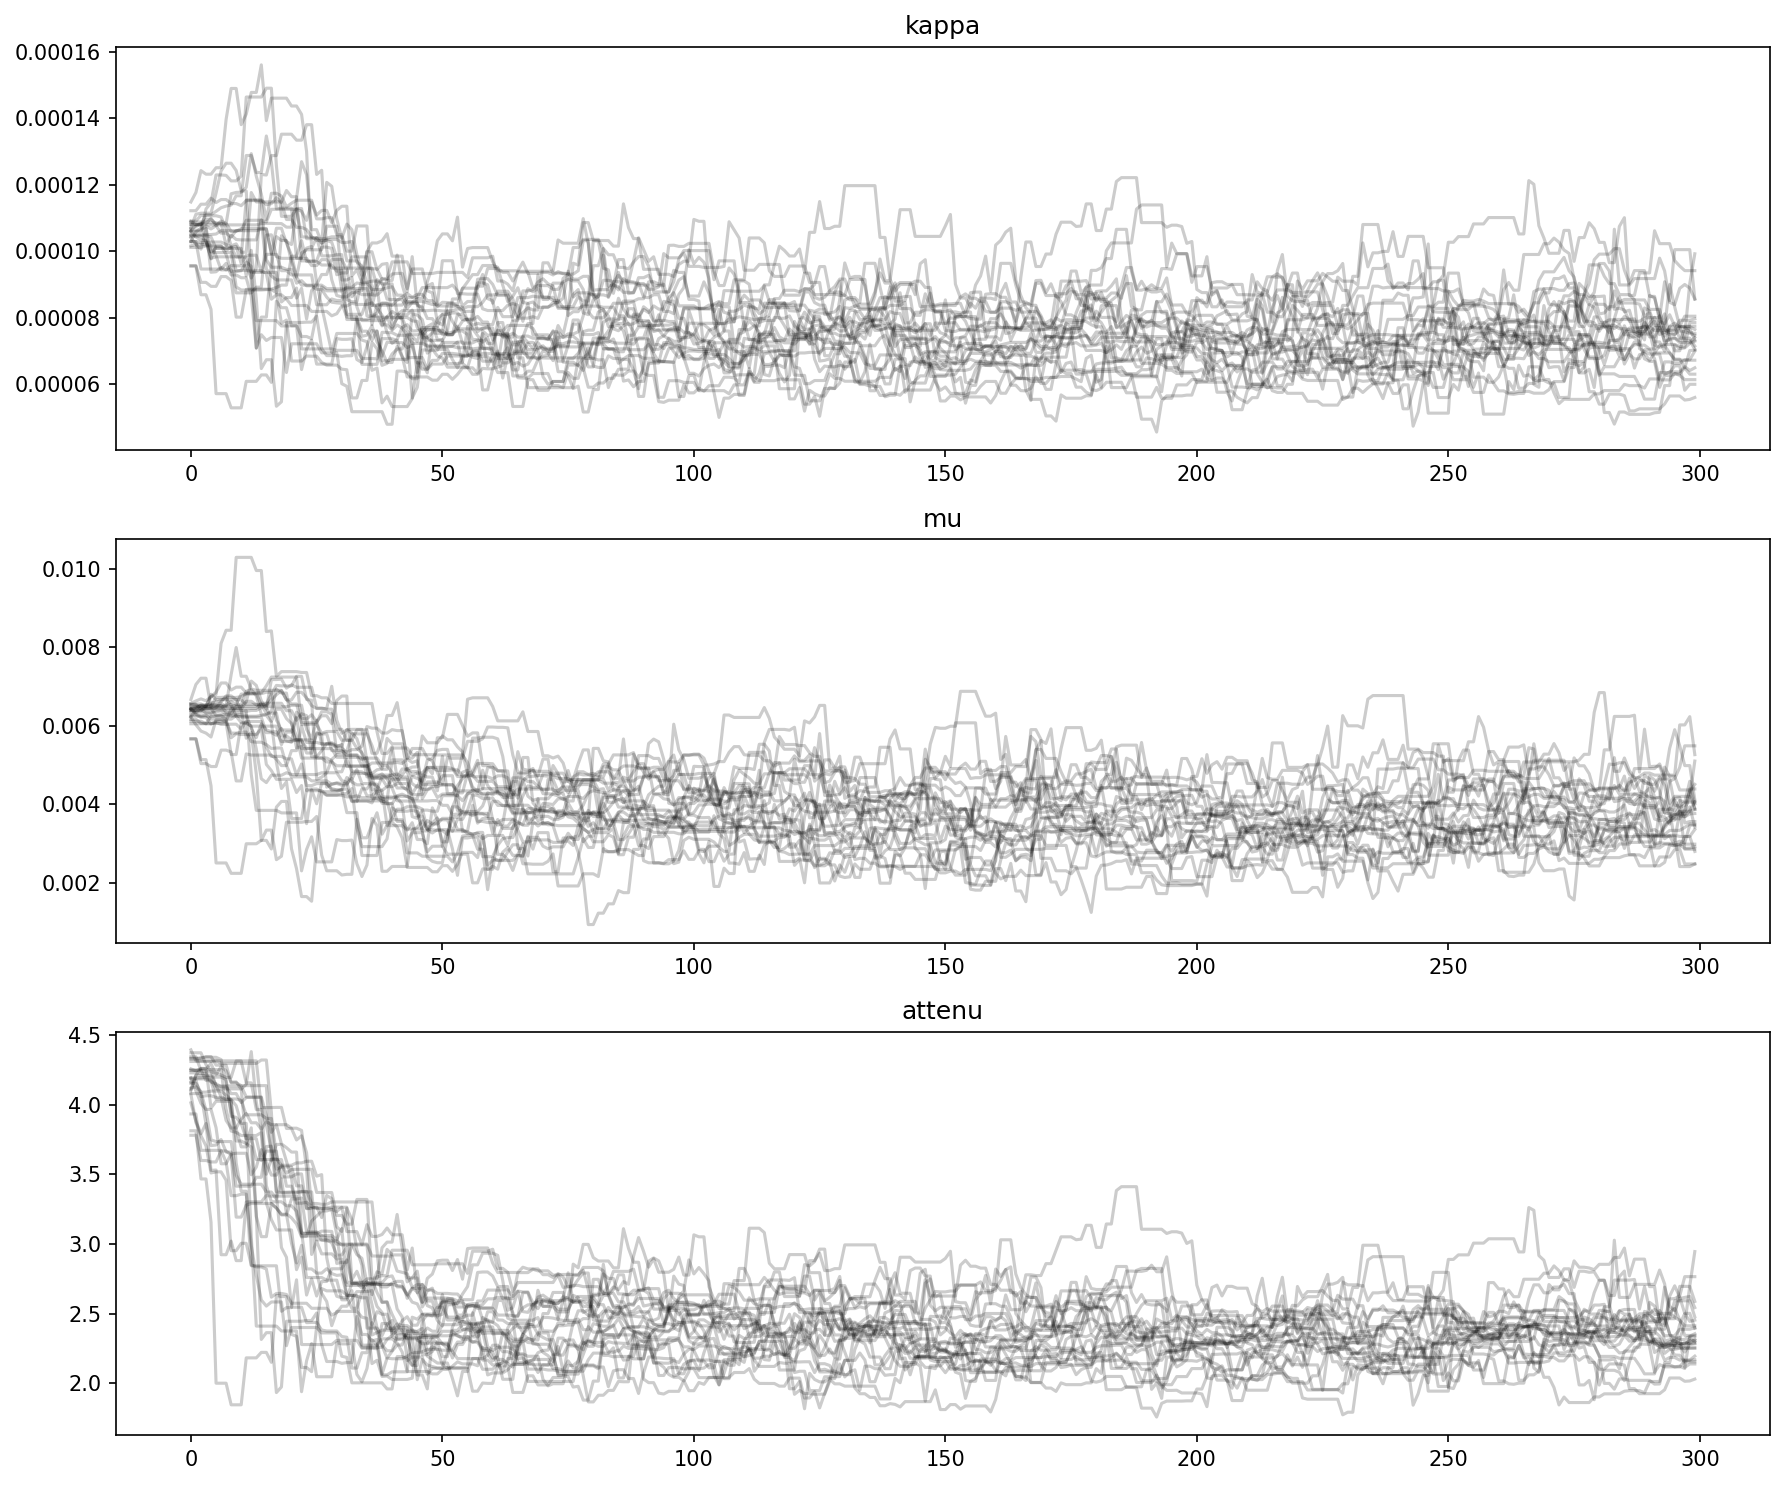

In [7]:
fig, ax = plt.subplots(3,1,figsize=(12,10),dpi=150)
for i in range(3):
    ax[i].plot(chain1[:300,:,i],c='k',alpha=0.2)
    ax[i].set(title=param_names[i])
    
fig.tight_layout()
#ax[0].set(ylim=(0,5e-4))
#ax[1].set(ylim=(0.0005,0.05))
#ax[2].set(ylim=(0.05,10))

plt.show()

### Choose burnin

In [8]:
burnin = 300

chain1_flat = chain1[burnin:,:,:].reshape((chain1.shape[0]-burnin)*chain1.shape[1],len(param_names))
#chain2_flat = chain2[burnin:,:,:].reshape((chain2.shape[0]-burnin)*chain2.shape[1],len(param_names))
#chain3_flat = chain3[burnin:,:,:].reshape((chain3.shape[0]-burnin)*chain3.shape[1],len(param_names))

### Corner plot file 1

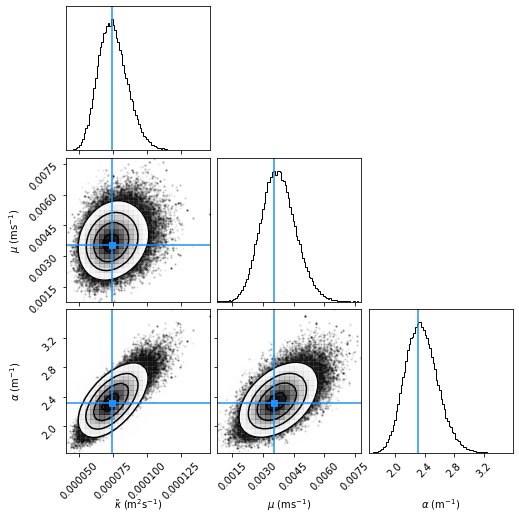

In [34]:
param_names = [r'$\tilde\kappa$ (m$^2$s$^{-1}$)',r'$\mu$ (ms$^{-1}$)',r'$\alpha$ (m$^{-1}$)']
fig = corner.corner(
    chain1_flat, labels=param_names,bins=30,hist_bin_factor=3,smooth=2,truths=maps,truth_color='dodgerblue')

#plt.savefig('../../Masterarbeit/thesis/figs/corner-both.pdf',bbox_inches='tight')

In [10]:
chain = chain1_flat.transpose()
chain1_flat.transpose().shape

(3, 232800)

In [11]:
ky,kx = np.histogram(chain[0],bins=100)
kx=(kx[1:]+kx[:-1])/2

my,mx = np.histogram(chain[1],bins=100)
mx=(mx[1:]+mx[:-1])/2

aly,alx = np.histogram(chain[2],bins=100)
alx=(alx[1:]+alx[:-1])/2

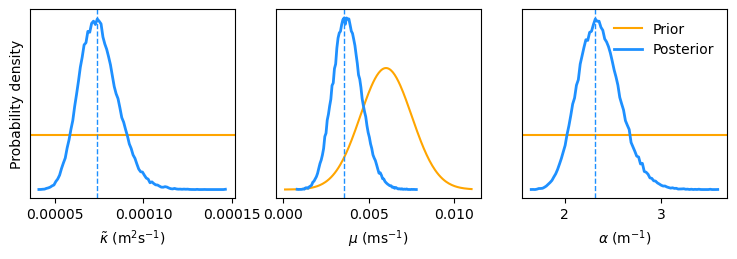

In [29]:
fig, ax = plt.subplots(1,3,figsize=(9,2.5),sharey=True,dpi=100)

ax[0].axhline(y=3000,c='orange')
ax[2].axhline(y=3000,label='Prior',c='orange')
xx = np.linspace(0.0001,0.011,200)
ax[1].plot(xx,stats.norm.pdf(xx,0.006,0.0015)*25,c='orange')

ax[0].plot(kx,ky,c='dodgerblue',lw=2)
ax[1].plot(mx,my*1.2,c='dodgerblue',lw=2)
ax[2].plot(alx,aly*1.1,c='dodgerblue',lw=2,label='Posterior')

for i in range(3):
    ax[i].set(xlabel=param_names[i],yticks=[])
    ax[i].axvline(maps[i],ls='--',lw=1,c='dodgerblue')
ax[0].set(ylabel='Probability density')
ax[2].legend(fontsize=10,frameon=False)

#plt.savefig('../../Masterarbeit/thesis/figs/posterior-both.pdf',bbox_inches='tight')

In [16]:
maps = [kx[np.argmax(ky)], mx[np.argmax(my)], alx[np.argmax(aly)]]

In [17]:
maps

[7.391954640890024e-05, 0.0035497250908049435, 2.314444021159577]